<a href="https://colab.research.google.com/github/Cyber-Dust/NBA-Stats-Enterprise-Data-Analytics/blob/main/Dasean_Volk_hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_bokeh
!pip install --upgrade bokeh==2.4.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 79.3 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.3.1
    Uninstalling bokeh-3.3.1:
      Successfully uninstalled bokeh-3.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.3.1 requires bokeh<3.4.0,>=3.2.0, but you have bokeh 2.4.3 which is incompatible.


In [ ]:
# import pre-installed and user-installed modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas_bokeh  # user-installed
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook

# pandas options
pd.set_option('display.max_rows', 100)
pd.set_option('plotting.backend', 'pandas_bokeh')
pandas_bokeh.output_notebook()


In [ ]:
!wget -nc 'https://raw.githubusercontent.com/uscprofessor/itp487_enterprise_data_analytics/main/data/titanic.csv'
titanic_raw = pd.read_csv('titanic.csv',header=None)


--2023-11-27 09:24:48--  https://raw.githubusercontent.com/uscprofessor/itp487_enterprise_data_analytics/main/data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84835 (83K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  82.85K  --.-KB/s    in 0.03s   

2023-11-27 09:24:48 (2.83 MB/s) - ‘titanic.csv’ saved [84835/84835]



In [ ]:
titanic_raw.head()


,0,1,2,3,4,5,6,7,8,9,10
0,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


In [ ]:
titanic_raw.shape



(1310, 11)

In [ ]:
titanic = titanic_raw.copy(deep=True)

In [ ]:
titanic.isnull().sum()


0        0
1        0
2        0
3        0
4      263
5        0
6        0
7        0
8        1
9     1014
10       2
dtype: int64

In [ ]:
titanic_raw = titanic_raw.dropna(how='any')

In [ ]:
titanic_raw.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [ ]:
titanic_raw.shape


(271, 11)

In [ ]:
titanic_raw = titanic_raw.drop_duplicates()
print(titanic_raw.duplicated())

0       False
2       False
4       False
7       False
11      False
        ...  
1296    False
1297    False
1299    False
1303    False
1306    False
Length: 271, dtype: bool


In [ ]:
titanic_raw.head()


,0,1,2,3,4,5,6,7,8,9,10
0,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S


In [ ]:
titanic_raw.head()

,0,1,2,3,4,5,6,7,8,9,10
0,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S


In [ ]:
titanic_raw = pd.read_csv('titanic.csv',header=0)

In [ ]:
titanic_raw.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_raw = titanic_raw.drop(['ticket', 'name'], axis=1)



In [ ]:
titanic_raw.head()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
titanic_raw['familysize'] = titanic_raw['sibsp'] + titanic_raw['parch'] + 1

In [ ]:
titanic_raw.head()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,familysize
0,0,3,male,22.0,1,0,7.2500,NaN,S,2
1,1,1,female,38.0,1,0,71.2833,C85,C,2
2,1,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,1,female,35.0,1,0,53.1000,C123,S,2
4,0,3,male,35.0,0,0,8.0500,NaN,S,1


In [ ]:
bins = [0, 2, 12, 18, 65, 99]
labels = ['Infant', 'Child', 'Teenager', 'Adult', 'Senior']
titanic_raw['agegroup'] = pd.cut(titanic_raw['age'], bins=bins, labels=labels, right=False)

In [ ]:
titanic_raw.head()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,familysize,agegroup
0,0,3,male,22.0,1,0,7.2500,NaN,S,2,Adult
1,1,1,female,38.0,1,0,71.2833,C85,C,2,Adult
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,Adult
3,1,1,female,35.0,1,0,53.1000,C123,S,2,Adult
4,0,3,male,35.0,0,0,8.0500,NaN,S,1,Adult


In [ ]:
import matplotlib.pyplot as plt
# Create a bar chart for the distribution of age groups
agegroup_distribution = titanic_raw['agegroup'].value_counts()

# Plotting
agegroup_distribution.plot(kind='bar', color='blueviolet', title='Distribution of Age Groups in Titanic Dataset', xlabel='Age Groups', ylabel='Number of People')

# Show the plot
plt.show()

HW 10 starts here

In [ ]:
titanic_raw.head()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,familysize,agegroup
0,0,3,male,22.0,1,0,7.2500,NaN,S,2,Adult
1,1,1,female,38.0,1,0,71.2833,C85,C,2,Adult
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,Adult
3,1,1,female,35.0,1,0,53.1000,C123,S,2,Adult
4,0,3,male,35.0,0,0,8.0500,NaN,S,1,Adult


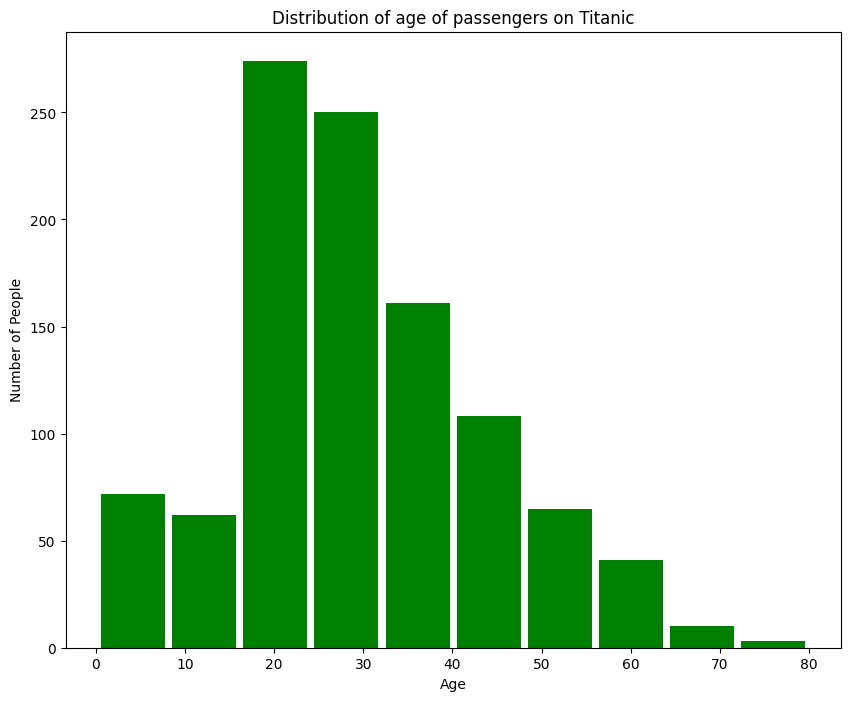

In [ ]:
# Histogram
# sets size of figure
fig, ax = plt.subplots(figsize=(10,8), dpi=100)
age_distribution = titanic_raw['age']
# set title and axis labels
plt.title(label='Distribution of age of passengers on Titanic')
plt.xlabel('Age')
plt.ylabel('Number of People')
# write code to create histogram here

plt.hist(x=age_distribution, bins=10, color='green', rwidth=.9)

plt.show()

In [ ]:
num_gender = titanic_raw['sex'].value_counts()
print(num_gender)

male      843
female    466
Name: sex, dtype: int64


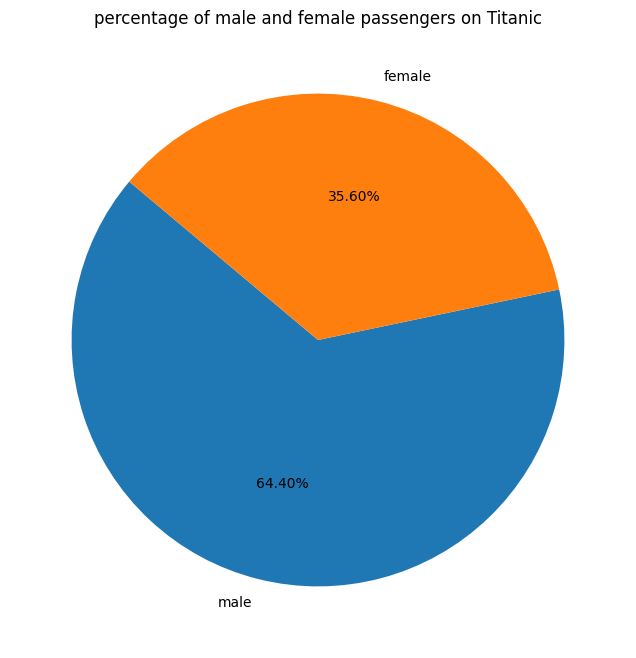

In [ ]:
# Pie Char
fig, ax = plt.subplots(figsize=(14,8), dpi=100)


# set title
plt.title(label='percentage of male and female passengers on Titanic')


# write code to create pie chart here
plt.pie(x=num_gender, labels=num_gender.index, autopct='%1.2f%%', startangle = 140)


plt.show()

In [ ]:
survival_rate = titanic_raw.groupby('pclass')['survived'].mean()

survival_rate.reset_index()

,pclass,survived
0,1,0.752322
1,2,0.649819
2,3,0.473907


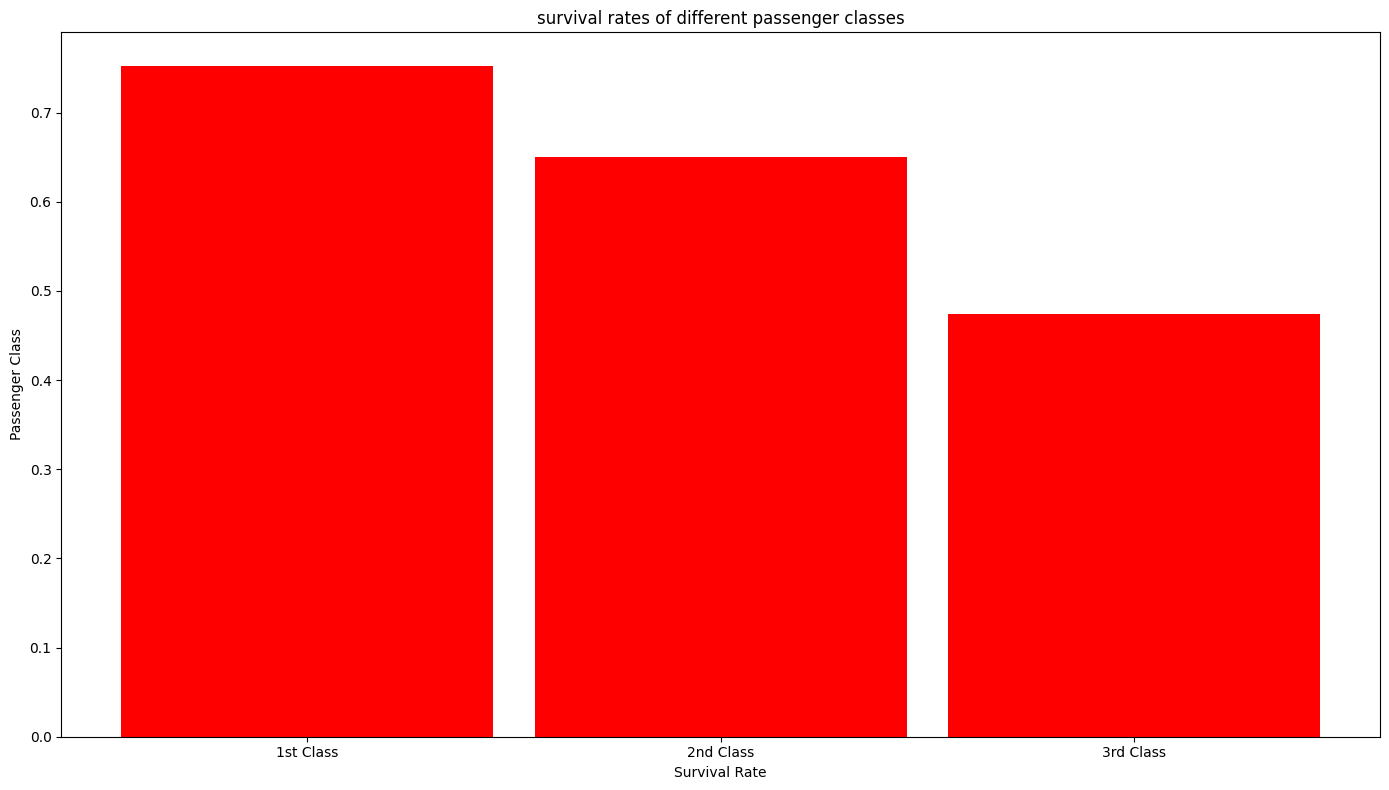

In [ ]:
# Bar chart -
fig, ax = plt.subplots(figsize=(14,8), dpi=100)


# set title, and axis labels
plt.title(label='survival rates of different passenger classes')
plt.xlabel('Survival Rate')
plt.ylabel('Passenger Class')
plt.yticks
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'], rotation=0)



# write code to create bar chart here
plt.bar(x=survival_rate.index, height=survival_rate, width=.9, color='red')
plt.tight_layout()
plt.show()

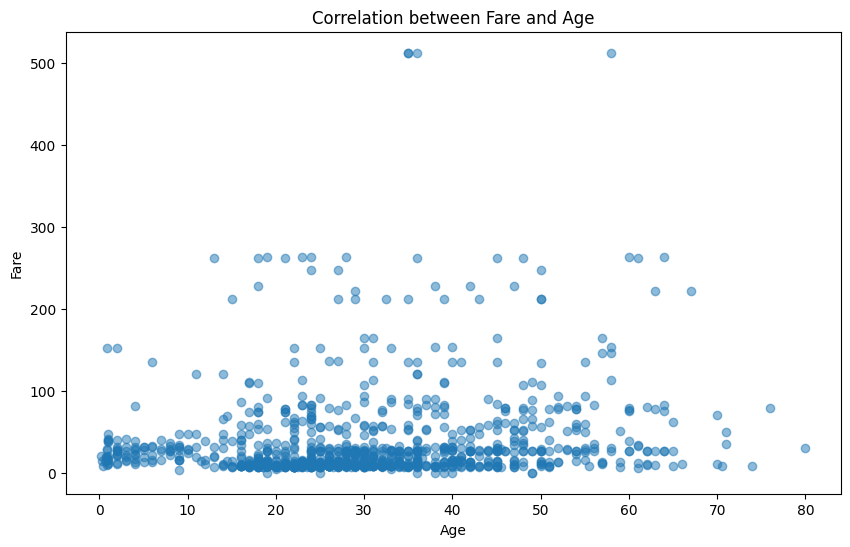

In [ ]:
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(x=titanic_raw['age'], y=titanic_raw['fare'], alpha=0.5)

# Set title, xlabel, and ylabel
plt.title('Correlation between Fare and Age')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

In [ ]:
avg_age = titanic_raw.groupby('age')['fare'].mean()

avg_age.reset_index()

,age,fare
0,0.17,20.575000
1,0.33,14.400000
2,0.42,8.516700
3,0.67,14.500000
4,0.75,17.430533
5,0.83,19.033333
6,0.92,89.650000
7,1.00,28.050420
8,2.00,34.881250
9,3.00,24.066671


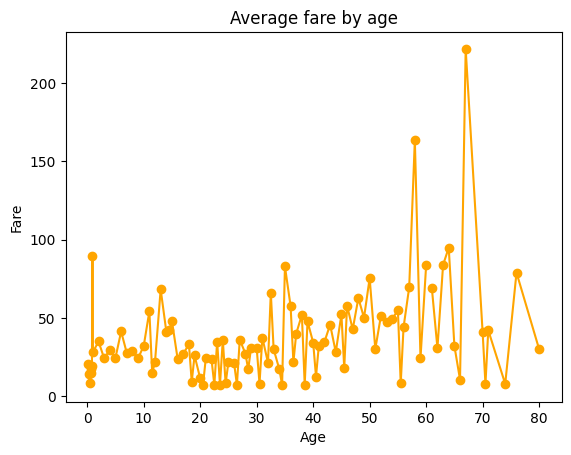

In [ ]:
# Create line plot with markers
plt.plot(avg_age.index, avg_age, marker='o', color='orange')

plt.title('Average fare by age')
plt.xlabel('Age')
plt.ylabel('Fare')

# Show the plot
plt.show()